<a href="https://colab.research.google.com/github/pabloderen/DynamoOCR/blob/master/DynamoOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload images
Browse the image files you want to read

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test3.png to test3.png


check if pip and apt-get packages have been installed already

In [0]:
# #Install dependencies remove comments to run the first time
from pathlib import Path
#check if notebook was executed, if not install dependencies
my_file = Path("executed")
if not my_file.is_file():
    !pip install pytesseract
    !pip install pillow
    !sudo apt install tesseract-ocr
    !sudo apt install libtesseract-dev
    f = open(my_file, "w")
    f.write("Executed")
    f.close()

##Real Imports
importing pillow, numpy, cv2 and pytesseract for OCR

In [0]:

from PIL import Image, ImageFilter
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

## Detect titles
Once we have the nodes, we crop the titles to later read the information

In [0]:
#Cut nodes titles
def cutTitles(image):
    imgA = img
    gray = cv2.cvtColor(imgA,cv2.COLOR_BGR2GRAY)
    # inverse thresholding
    height, width, channels = imgA.shape 
    thresh = cv2.threshold(gray, 195, 255, cv2.THRESH_BINARY_INV)[1]
    contours = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)[0]

    centers = []
    cut = []
    offset = -10
    for c in contours:
        # get the bounding rect
        x, y, w, h = cv2.boundingRect(c)
        if w*h>1000 and h*3.5< w: # danger!
            
            c =imgA[y-offset:y+h+offset, x-offset:x+w+offset]
            center = [(y+h)/2, (x+w)/2]
            centers.append(center)
            cut.append(c)

    
    print(len(cut))
    return  cut, centers



## Process images (OCR)
Return the text inside the node titles


In [0]:
#Process image to get titles
def processImage(img):
    threshText = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)[1]
    edged =cv2.bitwise_not(threshText)
    data = pytesseract.image_to_string(img, lang='eng',config='--psm 11')
    return data

In [0]:
def searchPackage(name, df):
    print(name)
    # mask = df['nodeName'].applymap(lambda x: name  == str(x))
    df1 = df[df.nodeName.str.contains(name)]
    print(df1.to_string(header=False))

# Execute
Each result returns the text, image and location of the text in the general canvas of the original image.

4


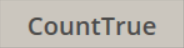

CountTrue
101  List.CountTrue  M:DSCore  System.Collections.IList  M:DSCore.List.CountTrue(System.Collections.IList)  Returns the number of true boolean values in t...
[244.5, 142.0]


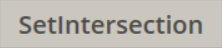

Setintersection
Empty DataFrame
Columns: [nodeName,  "library",  "inputType",  "completeName",  "summary"]
Index: []
[224.5, 475.0]


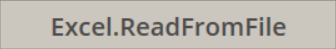

Excel.ReadFromFile
Empty DataFrame
Columns: [nodeName,  "library",  "inputType",  "completeName",  "summary"]
Index: []
[64.0, 444.0]


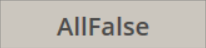

AllFalse
129  List.AllFalse  M:DSCore  System.Collections.IList  M:DSCore.List.AllFalse(System.Collections.IList)  Determines if all items in the given list is a...
[60.5, 144.0]


In [28]:
#Process the image, place the image in the folder

import pandas as pd
url = 'https://raw.githubusercontent.com/pabloderen/DynamoOCR/master/nodes_list.csv'
df = pd.read_csv(url)
df.set_index('nodeName')

for path in uploaded.keys():
    cut, center  = cutTitles(cv2.imread(path))
    count = 0
    titles = []
    for index, i in enumerate(cut):
        cv2_imshow(i)
        name = processImage(i)
        searchPackage(name, df)
        print(center[index])

    cv2.waitKey()
    

